<div style="text-align: center; padding: 20px; background-color: #f0f8ff; border-bottom: 2px solid #008cba;">
    <h1 style="font-size: 3em; color: #008cba;">🌐 Kidney_Prediction 🌐</h1>
    <h2 style="font-size: 2em; color: #333;">✨ Created By Abdulrahman Mohammed ✨</h2>
</div>

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">Import Libs & Load dataset</p>

In [48]:
!git clone https://github.com/Abdo-Mohammed-10/ML1_P.git

fatal: destination path 'ML1_P' already exists and is not an empty directory.


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [50]:
df= pd.read_csv('/content/ML1_P/Kidney/ckd_clean.xls')

In [51]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1


In [52]:
df.shape

(158, 25)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">2. Data Preproccessing</p>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    float64
 1   Blood Pressure           158 non-null    float64
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    float64
 4   Sugar                    158 non-null    float64
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    float64
 10  Blood Urea               158 non-null    float64
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    float64
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [54]:
df.isnull().sum()

,0
Age,0
Blood Pressure,0
Specific Gravity,0
Albumin,0
Sugar,0
Red Blood Cells,0
Pus Cell,0
Pus Cell clumps,0
Bacteria,0
Blood Glucose Random,0


In [65]:
df['Class'].value_counts()

,count
Class,
0,115
1,43


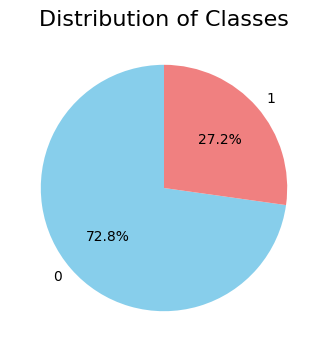

In [87]:

plt.figure(figsize=(4, 4))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Classes', fontsize=16)
plt.ylabel('')
plt.show()


### 0 = Chronic kidney disease - Negative

### 1 = Chronic kidney disease + Positive

In [56]:
df.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Class
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,1.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [57]:
# check of duplicated row
duplicate_count=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [58]:
categorical_columns = [
    'Red Blood Cells', 'Pus Cell',
    'Hypertension', 'Diabetes Mellitus',
    'Anemia'
]
df[categorical_columns].head(1)

,Red Blood Cells,Pus Cell,Hypertension,Diabetes Mellitus,Anemia
0,normal,abnormal,yes,no,yes


In [59]:
for column in categorical_columns:
    print(df[column].unique())

['normal' 'abnormal']
['abnormal' 'normal']
['yes' 'no']
['no' 'yes']
['yes' 'no']


## Label Encoding

In [60]:
le = LabelEncoder()
df[ 'Red Blood Cells'] = le.fit_transform(df['Red Blood Cells'])
df[ 'Pus Cell'] = le.fit_transform(df['Pus Cell'])
df[ 'Hypertension'] = le.fit_transform(df['Hypertension'])
df[ 'Diabetes Mellitus'] = le.fit_transform(df['Diabetes Mellitus'])
df[ 'Anemia'] = le.fit_transform(df['Anemia'])
df[categorical_columns].head(1)

,Red Blood Cells,Pus Cell,Hypertension,Diabetes Mellitus,Anemia
0,1,0,1,0,1


In [61]:
mapping ={1:0,0:1}
df[ 'Red Blood Cells']=df[ 'Red Blood Cells'].map(mapping)
df[ 'Pus Cell']=df[ 'Pus Cell'].map(mapping)

In [62]:
df[categorical_columns].head(1)

,Red Blood Cells,Pus Cell,Hypertension,Diabetes Mellitus,Anemia
0,0,1,1,0,1


### normal --> 0
### upnormal --> 1
### yes --> 1
### no --> 0

### Seperate Labels

In [63]:
X=df.drop(['Age', 'Blood Pressure','Sugar','Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random','White Blood Cell Count', 'Red Blood Cell Count','Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Class'],axis=1)
y=df['Class']

In [66]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

print(y_resampled.value_counts())


Class
1    115
0    115
Name: count, dtype: int64


In [67]:
print(y_resampled.shape)
print(X_resampled.shape)

(230,)
(230, 13)


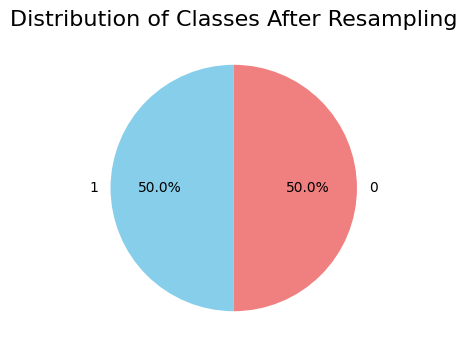

In [92]:
plt.figure(figsize=(4, 4))
y_resampled.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Classes After Resampling', fontsize=16)
plt.ylabel('')
plt.show()


In [68]:
X_resampled.head(10)

,Specific Gravity,Albumin,Red Blood Cells,Pus Cell,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,Hypertension,Diabetes Mellitus,Anemia
0,1.005,4.0,0,1,56.0,3.8,111.0,2.5,11.2,32.0,1,0,1
1,1.020,2.0,1,1,107.0,7.2,114.0,3.7,9.5,29.0,1,1,1
2,1.010,3.0,1,1,60.0,2.7,131.0,4.2,10.8,32.0,1,1,0
3,1.010,3.0,0,1,90.0,4.1,130.0,6.4,5.6,16.0,1,1,0
4,1.015,2.0,1,1,148.0,3.9,135.0,5.2,7.7,24.0,1,1,1
5,1.025,4.0,0,1,163.0,7.7,136.0,3.8,9.8,32.0,1,0,1
6,1.010,3.0,0,1,87.0,2.7,130.0,4.0,12.5,37.0,1,1,0
7,1.005,0.0,0,0,32.0,0.9,125.0,4.0,10.0,29.0,1,1,0
8,1.020,2.0,1,1,142.0,4.6,138.0,5.8,10.5,33.0,1,1,0
9,1.010,1.0,0,0,92.0,3.3,141.0,4.0,9.8,28.0,1,1,0


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">3. Data Standardization</p>

In [69]:
scaler= StandardScaler()
X_resampled=scaler.fit_transform(X_resampled)

In [70]:
X_resampled

array([[-2.02825862,  1.61553016, -0.5       , ...,  1.25867774,
        -0.70250017,  2.32139805],
       [ 0.3722533 ,  0.36654886,  2.        , ...,  1.25867774,
         1.42348719,  2.32139805],
       [-1.22808798,  0.99103951,  2.        , ...,  1.25867774,
         1.42348719, -0.4307749 ],
       ...,
       [-1.22808798,  0.36654886, -0.5       , ...,  1.25867774,
        -0.70250017, -0.4307749 ],
       [-1.22808798,  0.99103951, -0.5       , ...,  1.25867774,
        -0.70250017,  2.32139805],
       [-1.22808798,  1.61553016, -0.5       , ...,  1.25867774,
         1.42348719,  2.32139805]])

In [71]:
print(y_resampled)

0      1
1      1
2      1
3      1
4      1
      ..
225    1
226    1
227    1
228    1
229    1
Name: Class, Length: 230, dtype: int64


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">4. Train Test Split</p>

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [73]:
X_train.shape,X_test.shape

((184, 13), (46, 13))

In [74]:
Y_train.shape,Y_test.shape

((184,), (46,))

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">RandomForestClassifier</p>


In [75]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print('accuracy score on the training data : ',model.score(X_train, Y_train))
print('accuracy score on the testing data : ',model.score(X_test, Y_test))

accuracy score on the training data :  1.0
accuracy score on the testing data :  1.0


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">6.  accuracy score on the training & testing data
</p>

### accuracy score on the training data

In [76]:
X_train_pred=model.predict(X_train)
print('accuracy score on the training data : ',accuracy_score(X_train_pred,Y_train))

accuracy score on the training data :  1.0


### accuracy score on the testing data

In [77]:
X_test_pred=model.predict(X_test)
print('accuracy score on the training data : ',accuracy_score(X_test_pred,Y_test))

accuracy score on the training data :  1.0


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);">7. Building System to Predict Input</p>

In [78]:
input_data=(1.010,3.0,0,1,87.0,2.7,130.0,4.0,12.5,37.0,1,1,0) # 6th Row
input_data_arr=np.asarray(input_data)
input_data_arr_reshape=input_data_arr.reshape(1,-1)


input_data_arr_scaler=scaler.transform(input_data_arr_reshape)
print(input_data_arr_scaler)


predict_input=model.predict(input_data_arr_scaler)
print(predict_input)


if predict_input==0:
    print("Chronic kidney disease - Negative")
else:
    print("Chronic kidney disease + Positive")


[[-1.22808798  0.99103951 -0.5         1.42348719  0.39182505 -0.10328889
  -0.75301566 -0.17976412 -0.0325646  -0.15308579  1.25867774  1.42348719
  -0.4307749 ]]
[1]
Chronic kidney disease + Positive


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);"> Saving Model</p>

In [79]:
import joblib

In [80]:
joblib.dump(model, 'Chronickidney.pkl')
print("Model saved!")

joblib.dump(scaler, 'ScalerChronickidney.pkl')
print("Scaler saved!")
loaded_model = joblib.load('Chronickidney.pkl')
new_predictions = loaded_model.predict(X_test)
print(f"Restored Model Accuracy: {accuracy_score(Y_test, new_predictions):.2f}")

Model saved!
Scaler saved!
Restored Model Accuracy: 1.00


In [81]:
loaded_model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [84]:
np.array(Y_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])